In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
# reading csv claimdata_utf8
# check number of observations and features
lloss = pd.read_csv('claimdata_utf8.csv', low_memory=False)
lloss.shape

(518077, 76)

*** There are 518077 records and 76 variables(including target variable "EV_LARGE")***
##### Column 41 has mixed data type.

In [3]:
lloss.head()

,Event_Number,Claim_Number,Event_Occurrence_Month,Inception_Month,Issued_Date,Issued_Time,Coverage1,Coverage2,PI_Class,IN_OUTPATIENT,...,Car_Age,Previous_Accidents,Insured_Sex,Insured_Age,Insured_Age_Range,Region,Prefecture,Prev_Insurer_Category,Original_Channel,Renewal_Times
0,7541881,NaN,2011/1/1,2010/4/1,2010/4/24,14:23,NaN,NaN,NaN,NaN,...,12,0,2,36,30-39,(02) 東北,福島県,(02) Non Direct,(01) Phone,7
1,7541914,8981138.0,2011/1/1,2010/12/1,2010/11/11,16:37,6.0,6.0,3.0,1.0,...,0,0,1,61,60-,(07) 九州,福岡県,(02) Non Direct,(01) Phone,7
2,7541914,8981144.0,2011/1/1,2010/12/1,2010/11/11,16:37,3.0,3.0,3.0,1.0,...,0,0,1,61,60-,(07) 九州,福岡県,(02) Non Direct,(01) Phone,7
3,7541936,8960750.0,2011/1/1,2010/2/1,2010/2/8,14:32,2.0,2.0,NaN,NaN,...,13,0,1,48,40-49,(07) 九州,熊本県,(99) New,(01) Phone,1
4,7541986,8960833.0,2011/1/1,2010/6/1,2010/6/4,14:26,2.0,2.0,NaN,NaN,...,7,0,1,67,60-,(03) 関東,茨城県,(02) Non Direct,(03) Broker,1


In [4]:
lloss.describe()

,Event_Number,Claim_Number,Coverage1,Coverage2,PI_Class,IN_OUTPATIENT,Incurred,Contract_Status,Annual_Premium,Annual_Premium_BIL,...,EQ_Coverage,License_Color,Mileage,Usage,Car_Type,Car_Age,Previous_Accidents,Insured_Sex,Insured_Age,Renewal_Times
count,5.180770e+05,4.621880e+05,462188.000000,462188.000000,95185.000000,74812.000000,5.180770e+05,517770.000000,518077.000000,518077.000000,...,518077.000000,518077.000000,518077.000000,518077.000000,518077.000000,518077.000000,518077.000000,518077.000000,518077.000000,518077.000000
mean,9.720327e+06,1.171118e+07,3.116505,3.684801,2.925892,2.326940,1.653272e+05,8.630765,56748.640221,9884.482295,...,0.013085,2.566518,1.596533,2.248594,1.967113,5.904676,0.078519,1.416633,45.668277,3.290046
std,1.248416e+06,1.555914e+06,1.571757,2.453307,0.318921,1.210362,9.215794e+05,3.952935,32042.557641,6030.328908,...,0.113639,0.524390,0.684723,0.468868,0.844692,4.347452,0.268987,0.493001,14.557836,3.098196
min,7.541881e+06,8.960750e+06,1.000000,1.000000,1.000000,1.000000,-1.193140e+06,6.000000,8870.000000,2023.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,17.000000,0.000000
25%,8.616463e+06,1.033523e+07,2.000000,2.000000,3.000000,1.000000,0.000000e+00,7.000000,36470.000000,6420.000000,...,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,35.000000,1.000000
50%,9.758577e+06,1.177668e+07,3.000000,3.000000,3.000000,3.000000,5.000000e+04,7.000000,49580.000000,8265.000000,...,0.000000,3.000000,1.000000,2.000000,2.000000,6.000000,0.000000,1.000000,42.000000,2.000000
75%,1.075232e+07,1.305748e+07,4.000000,4.000000,3.000000,3.000000,1.768420e+05,7.000000,67800.000000,11304.000000,...,0.000000,3.000000,2.000000,3.000000,3.000000,9.000000,0.000000,2.000000,56.000000,5.000000
max,1.239077e+07,1.492181e+07,10.000000,19.000000,3.000000,5.000000,2.000270e+08,24.000000,612000.000000,118572.000000,...,1.000000,3.000000,3.000000,3.000000,6.000000,80.000000,1.000000,2.000000,98.000000,15.000000


#### target variable "EV_LARGE"

In [5]:
lloss['EV_LARGE'].isnull().sum() ### check missing observations

0

In [6]:
# how large each class is 
lloss['EV_LARGE'].value_counts()

EV_000M    466851
EV_001M     32146
EV_002M      9353
EV_004M      5312
EV_003M      2787
EV_010M      1574
EV_090M        54
Name: EV_LARGE, dtype: int64

##### EV_OO0M means large loss is less than 1M : non-large loss class with 466851 records

##### sum (EV_OO1M, EV_090M) : large loss class with 51226 records

#### class imbalanced data 

In [7]:
newnew = lloss.loc[lloss['EV_LARGE'] == 1]

In [8]:
# replace non-large loss class with 0, large loss class with 1
lloss['EV_LARGE'] = lloss['EV_LARGE'].replace(['EV_001M','EV_002M','EV_004M','EV_003M','EV_010M',
                          'EV_090M'],1)
lloss['EV_LARGE'] = lloss['EV_LARGE'].replace(['EV_000M'],0)

In [9]:
lloss['EV_LARGE'].value_counts()

0    466851
1     51226
Name: EV_LARGE, dtype: int64

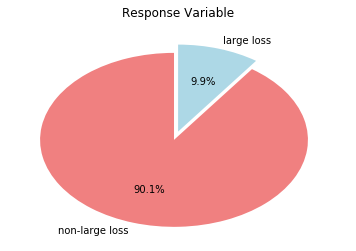

In [10]:
# target variable
labels = ["non-large loss","large loss"]
sizes = lloss.EV_LARGE.value_counts().values
explode=[0.1,0]
colors = ['lightcoral','lightblue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Response Variable")
plt.show()

In [11]:
# missing observations
lloss.isnull().sum()

Event_Number                   0
Claim_Number               55889
Event_Occurrence_Month         0
Inception_Month                0
Issued_Date                    0
Issued_Time                    0
Coverage1                  55889
Coverage2                  55889
PI_Class                  422892
IN_OUTPATIENT             443265
Incurred                       0
EV_LARGE                       0
Driver                     40822
Contract_Status              307
Reason                         0
Effective_Date                 0
Annual_Premium                 0
Annual_Premium_BIL             0
Annual_Premium_PDL             0
Annual_Premium_PPA             0
Annual_Premium_PI              0
Annual_Premium_ODPE            0
Annual_Premium_OD              0
Annual_Premium_PE              0
Annual_Premium_FB              0
Annual_Premium_FBB             0
Annual_Premium_FBP             0
Annual_Premium_LE              0
Annual_Premium_AXAP            0
Annual_Premium_PSE             0
          

#### missing values
- " ***Claim_Number*** " (under Event_Number, an accident can result in multiple claim numbers):55889
- " ***Coverage1*** " (coverage type 1):55889
- " ***Coverage2*** " (coverage type 2):55889
- " ***PI_Class*** "  (personal injury class):422892
- " ***IN_OUTPATIENT*** " (whether in the hospital):443265
- " ***Driver*** " (driver at the time of accident):40822
- " ***Contract_Status*** " (status of the contract):307
- " ***Prev_Insurer_Category*** " (category of previous insurer):43
- " ***Original_Channel*** "  (the method of reaching us for the first time):44

#### replace or delete missing observations

##### I. delete irrelevant features

- 'Driver'
- 'Coverage1'
- 'Coverage2'

In [12]:
lloss = lloss.drop(['Coverage1','Coverage2','Driver'], axis=1)

##### II. replace missing values

In [13]:
lloss['Prev_Insurer_Category'].value_counts()

(02) Non Direct    248808
(99) New           151298
(01) Direct        117928
Name: Prev_Insurer_Category, dtype: int64

In [14]:
# replace missing observations with 0
# 0 means none set-up 
lloss['PI_Class'] = lloss['PI_Class'].fillna(0.0)
lloss['IN_OUTPATIENT'] = lloss['IN_OUTPATIENT'].fillna(0.0)
lloss['Contract_Status'] = lloss['Contract_Status'].fillna(0.0)
lloss['Prev_Insurer_Category'] = lloss['Prev_Insurer_Category'].fillna(0)
lloss['Original_Channel'] = lloss['Original_Channel'].fillna(0)

#### clean independent variables

In [15]:
## reason: Japanese. transfer to English
lloss['Reason'] = lloss['Reason'].replace('契約開始', 'The contract begins')
lloss['Reason'] = lloss['Reason'].replace('車両入替', 'Replacement vehicle')
lloss['Reason'] = lloss['Reason'].replace('パートナー情報', 'Partner Information')
lloss['Reason'] = lloss['Reason'].replace('その他の変更', 'Other changes')
lloss['Reason'] = lloss['Reason'].replace('運転者年齢条件', 'Driver age conditions')
lloss['Reason'] = lloss['Reason'].replace('VAN訂正', 'VAN Revised')
lloss['Reason'] = lloss['Reason'].replace('家族限定特約', 'Family limited special')
lloss['Reason'] = lloss['Reason'].replace('車両保険', 'Vehicle insurance')
lloss['Reason'] = lloss['Reason'].replace('使用目的', 'Intended use')
lloss['Reason'] = lloss['Reason'].replace('距離区分', 'Distance classification')
lloss['Reason'] = lloss['Reason'].replace('免許証の色', 'License color')
lloss['Reason'] = lloss['Reason'].replace('居住地域', 'Residential area')
lloss['Reason'] = lloss['Reason'].replace('等級訂正', 'Grade correction')
lloss['Reason'] = lloss['Reason'].replace('ファミリーバイク', 'Family bike')
lloss['Reason'] = lloss['Reason'].replace('登録番号', 'Registration number')
lloss['Reason'] = lloss['Reason'].replace('車台番号', 'Chassis number')
lloss['Reason'] = lloss['Reason'].replace('記名被保険者の変更', 'Changes to the name insured')
lloss['Reason'] = lloss['Reason'].replace('人身傷害補償担保特約', 'Personal injury compensation security agreement')
lloss['Reason'] = lloss['Reason'].replace('誤計上による訂正', 'Correction by miscorrection')
lloss['Reason'] = lloss['Reason'].replace('車両所有者の変更', 'Change of vehicle owner')
lloss['Reason'] = lloss['Reason'].replace('搭乗者傷害保険金額', 'Passenger injury insurance amount')
lloss['Reason'] = lloss['Reason'].replace('ﾍﾟｯﾄﾌﾟﾗｽ', 'Pet Plus')
lloss['Reason'] = lloss['Reason'].replace('弁護士費用(人+物)', 'Attorney fee (person + thing)')
lloss['Reason'] = lloss['Reason'].replace('免責金額の変更', 'Change of deductible amount')
lloss['Reason'] = lloss['Reason'].replace('自動継続特約', 'Automatic continuation rider')
lloss['Reason'] = lloss['Reason'].replace('対物賠償金額', 'Object reparation amount')
lloss['Reason'] = lloss['Reason'].replace('ﾌｧﾐﾘｰﾌﾟﾗｽ', 'Family Plus')
lloss['Reason'] = lloss['Reason'].replace('車両免責ゼロ特約', 'Vehicle disclaimer Zero rider')
lloss['Reason'] = lloss['Reason'].replace('対物全損時費用', 'Objective total loss cost')
lloss['Reason'] = lloss['Reason'].replace('口座情報', 'Account information')
lloss['Reason'] = lloss['Reason'].replace('任意解約', 'Arbitrary cancellation')
lloss['Reason'] = lloss['Reason'].replace('未払い解除', 'Unpaid released')
lloss['Reason'] = lloss['Reason'].replace('車両価額', 'Vehicle price')
lloss['Reason'] = lloss['Reason'].replace('ﾚﾃﾞｨｰｽﾌﾟﾗｽ', "Women's Plus")
lloss['Reason'] = lloss['Reason'].replace('地震全損一時金', 'Earthquake total loss lump sum')
lloss['Reason'] = lloss['Reason'].replace('初度登録年月', 'First registration date')
lloss['Reason'] = lloss['Reason'].replace('エアバッグ', 'Airbag')
lloss['Reason'] = lloss['Reason'].replace('免許取得日', 'License Acquisition Date')
lloss['Reason'] = lloss['Reason'].replace('約款違反解除（日割）', 'Cancellation of violation of contracts (daily)')
lloss['Reason'] = lloss['Reason'].replace('任意解約(会社都合)', 'Optional cancellation (company convenience)')
lloss['Reason'] = lloss['Reason'].replace('契約取消', 'Contract cancellation')

In [16]:
import re
lloss['Reason'] = lloss['Reason'].apply(lambda x: re.sub(' +',' ',x.lower()))

In [17]:
# Annual_Premium
lloss['Annual_Premium_BIL'].value_counts().sort_values()

75648      1
21403      1
21491      1
23538      1
23450      1
35660      1
17817      1
23047      1
25671      1
19352      1
14859      1
2573       1
17063      1
33613      1
21569      1
21702      1
17156      1
39768      1
3287       1
17305      1
20721      1
16338      1
29599      1
24839      1
3064       1
25491      1
27554      1
43652      1
17493      1
41652      1
        ... 
7200     218
9000     218
7764     218
9240     219
6888     219
7092     220
6900     222
8400     223
9252     224
6420     224
7992     224
7512     225
6636     225
9312     226
7872     230
6924     231
7272     231
6492     231
8028     231
7416     233
8304     234
6912     235
6552     238
7824     239
7728     240
7440     240
8976     244
6780     250
8136     252
7548     261
Name: Annual_Premium_BIL, Length: 23092, dtype: int64

##### 'Annual_Premium': Insurance premium is the amount of money customers pay to an insurance company for active coverage.
##### "Annual_Premium_BIL", "Annual_Premium_PDL","Annual_Premium_PPA!", ...... Their values are different and range from 0 to 6000+ , representing the value of payment

In [18]:
# coverage: the amount of risk or liability that is covered for 
# an individual or entity by way of insurance services

#personal injury
lloss['PI_Coverage'].value_counts().sort_values()

0     89207
1    428870
Name: PI_Coverage, dtype: int64

##### the value is 0 or 1. 1 means insurer will take responsibility of this type of coverage while 0 means the opposite.

#### tranforming datatype for later manipulation

In [19]:
lloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518077 entries, 0 to 518076
Data columns (total 73 columns):
Event_Number              518077 non-null int64
Claim_Number              462188 non-null float64
Event_Occurrence_Month    518077 non-null object
Inception_Month           518077 non-null object
Issued_Date               518077 non-null object
Issued_Time               518077 non-null object
PI_Class                  518077 non-null float64
IN_OUTPATIENT             518077 non-null float64
Incurred                  518077 non-null int64
EV_LARGE                  518077 non-null int64
Contract_Status           518077 non-null float64
Reason                    518077 non-null object
Effective_Date            518077 non-null object
Annual_Premium            518077 non-null int64
Annual_Premium_BIL        518077 non-null int64
Annual_Premium_PDL        518077 non-null int64
Annual_Premium_PPA        518077 non-null int64
Annual_Premium_PI         518077 non-null int64
Annual_Prem

##### Data type for each variable
##### we'd better to transform datatype for following variables:

- 'PDL_Limit', 'Deduct', 'PPA_Limit','Original_Channel','Insured_Age_Range' 'PI_Limit','Tariff','Bonus_Malus','Bonus_Malus_Range','Prev_Insurer_Category',

##### text variables

- 'Region'                  

- 'Prefecture' 

- 'Car_Name '

- 'Reason'

##### Datetime variables
- 'Event_Occurrence_Month'

- 'Inception_Month'

- 'Issued_Date'

- 'Issued_Time'

- 'Effective_Date'

##### learning:
- transform datatype
- handle timestamp
- handle text variables

In [20]:
lloss['PDL_Limit'] = lloss['PDL_Limit'].replace('(01) Unlimited', 1)
lloss['PDL_Limit'] = lloss['PDL_Limit'].replace('(03) 10m', 3)
lloss['PDL_Limit'] = lloss['PDL_Limit'].replace('(04) 20m', 4)

In [21]:
lloss['Deduct'] = lloss['Deduct'].replace('(07) 30% Deductible','7')
lloss['Deduct'] = lloss['Deduct'].astype(int)

In [22]:
def transform_dtype(feature,old_value,new_value):
    lloss[feature] = lloss[feature].replace(old_value,new_value)
    return type(lloss[feature].iloc[0])

In [23]:
transform_dtype('PPA_Limit',['(04) 10m','(03) 5m','(05) 15m','(00) NO','(06) 20m'], [4,3,5,0,6])

numpy.int64

In [24]:
transform_dtype('PI_Limit',['(02) 30m','(04) 50m','(00) NO','(07) 80m','(09) 100m','(01) Unlimited','(06) 70m',
                           '(03) 40m','(05) 60m','(08) 90m'], [2,4,0,7,9,1,6,3,5,8])
transform_dtype('Tariff','(01) AUTO', 1)
transform_dtype('Bonus_Malus',['07F','06New','06F','07New'], [7,60,6,70])
lloss['Bonus_Malus'] = lloss['Bonus_Malus'].astype(int)

In [25]:
transform_dtype('Bonus_Malus_Range','06_07New','06_07')
lloss['Bonus_Malus_Range'] = lloss['Bonus_Malus_Range'].astype(int)

In [26]:
transform_dtype('Original_Channel',['(01) Phone','(02) Internet','(03) Broker','(05) Re-quote',
                    '(06) Axa Life','(07) Agent','(09) MGM','(04) Fax','(08) Banc','Database marketing'],
                [1,2,3,5,6,7,9,4,8,10])

numpy.int64

In [27]:
# transfer text to integer
transform_dtype('Region',['(01) 北海道','(02) 東北','(03) 関東','(04) 北陸東海','(05) 近畿中国',
                         '(06) 四国','(07) 九州'],[1,2,3,4,5,6,7])

numpy.int64

In [28]:
# fillna in ['Prev_Insurer_Category']
lloss['Prev_Insurer_Category'] = lloss['Prev_Insurer_Category'].fillna(0)
transform_dtype('Prev_Insurer_Category',['(01) Direct','(99) New','(02) Non Direct'],[1,99,2])

numpy.int64

In [29]:
# fillna in ['Original_Channel']
lloss['Original_Channel'] = lloss['Original_Channel'].fillna(0)

#### timestamp

##### breaking datatime : break into 'year', 'month', and 'date'
- 'Event_Occurrence_Month'  
- 'Inception_Month'           
- 'Issued_Date'              
- 'Issued_Time'               
- 'Effective_Date' 

In [30]:
lloss.loc[0,'Event_Occurrence_Month']

'2011/1/1'

In [31]:
# def datetime(new_feature,feature,year,month,date):
#     lloss[new_feature] = pd.to_datetime(lloss[feature])
#     lloss[year] = lloss[new_feature].dt.year
#     lloss[month] = lloss[new_feature].dt.month
#     lloss[date] = lloss[new_feature].dt.day
#     return lloss[year].head()

In [32]:
# datetime('Event_Occurrence','Event_Occurrence_Month','Event_Occurrence_year','Event_Occurrence_month','Event_Occurrence_date')
# datetime('Inception','Inception_Month','Inception_year', 'Inception_month','Inception_date')
# datetime('Issued','Issued_Date','Issued_year','Issued_month','Issued_date')
# datetime('Effective','Effective_Date','Effective_year','Effective_month','Effective_date')

In [33]:
lloss['Issued_Time'] = [item.replace(':','') for item in list(lloss['Issued_Time'].values)]

In [34]:
lloss['Issued_Time'] = lloss['Issued_Time'].astype(int)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(lloss['Insured_Age_Range']) 
list(le.classes_)
le.fit_transform(lloss['Insured_Age_Range'])

array([2, 5, 5, ..., 2, 3, 5])

In [44]:
lloss['Insured_Age_Range_Num']= le.fit_transform(lloss['Insured_Age_Range'])

In [45]:
lloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518077 entries, 0 to 518076
Data columns (total 74 columns):
Event_Number              518077 non-null int64
Claim_Number              462188 non-null float64
Event_Occurrence_Month    518077 non-null object
Inception_Month           518077 non-null object
Issued_Date               518077 non-null object
Issued_Time               518077 non-null int64
PI_Class                  518077 non-null float64
IN_OUTPATIENT             518077 non-null float64
Incurred                  518077 non-null int64
EV_LARGE                  518077 non-null int64
Contract_Status           518077 non-null float64
Reason                    518077 non-null object
Effective_Date            518077 non-null object
Annual_Premium            518077 non-null int64
Annual_Premium_BIL        518077 non-null int64
Annual_Premium_PDL        518077 non-null int64
Annual_Premium_PPA        518077 non-null int64
Annual_Premium_PI         518077 non-null int64
Annual_Premi

In [46]:
"""
Reason                    518077 non-null object
Car_Name                  518077 non-null object
Prefecture                518077 non-null object
"""

'\nReason                    518077 non-null object\nCar_Name                  518077 non-null object\nPrefecture                518077 non-null object\n'

In [47]:
lloss['Prefecture'] = le.fit_transform(lloss['Prefecture'])

In [48]:
lloss['Reason'] = le.fit_transform(lloss['Reason'])

In [49]:
feature_lst = ['Claim Number','Event Number',' Driver','Coverage1','Coverage2','Paid','OS','Car_Name']
columns = list(lloss.columns)                                                                                     
features_to_use = [col for col in columns if col not in feature_lst]

In [50]:
# new = lloss.loc[lloss['EV_LARGE'] == 1]

In [51]:
new_claimdata = lloss[features_to_use]
new_claimdata.to_csv('new_claimdata.csv',index = False)